# EJERCICIO 1

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
import time
import datetime as dt

In [3]:
from datetime import date

In [4]:
hoy=date.today()
hoy

datetime.date(2023, 6, 8)

In [5]:
start = hoy-dt.timedelta(days=30*6) #asumimos dias de 30 dias
end =   hoy

In [6]:
start

datetime.date(2022, 12, 10)

In [7]:
tickers_sp500= list(pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0].Symbol)
tickers_sp500

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BG',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',

In [8]:
data = yf.download(tickers_sp500,start,end)['Adj Close']
data

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted


,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-12,154.846436,14.20,142.619064,144.070450,162.270477,166.209305,108.454483,60.000000,290.010254,338.170013,...,86.214119,70.535660,104.374184,30.284037,112.564659,128.446640,125.651459,258.100006,47.194973,152.174850
2022-12-13,157.169174,13.46,142.374725,145.047607,161.750229,164.052170,110.475189,59.900002,292.996246,342.459991,...,86.473518,70.545517,105.515427,31.415220,114.253769,128.951935,127.942726,263.269989,47.077961,154.275391
2022-12-14,154.328049,13.35,140.205109,142.794174,161.818954,164.290756,110.207756,60.320000,289.127350,339.920013,...,86.124313,70.200668,104.738205,31.802204,114.015305,130.012085,127.753456,261.500000,46.356384,151.099686
2022-12-15,150.390350,12.93,141.459396,136.103638,160.091415,164.618805,107.493660,60.750000,278.879669,328.709991,...,84.757423,69.579948,103.734703,31.018312,109.931625,129.249176,126.538078,251.039993,45.722569,148.043457
2022-12-16,148.835205,12.81,138.427353,134.119415,157.519745,165.801743,105.898895,61.029999,262.372284,338.540009,...,85.815025,68.890259,103.006668,30.284037,109.206299,128.179123,125.103546,248.919998,44.922985,143.812500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,116.260002,14.70,68.029999,180.089996,133.440002,172.589996,102.820000,69.669998,305.200012,426.750000,...,96.480003,63.549999,103.360001,37.660000,102.129997,132.250000,127.360001,266.200012,27.670000,166.000000
2023-06-02,118.220001,14.87,67.559998,180.949997,136.869995,174.520004,104.199997,70.900002,311.390015,436.369995,...,100.349998,63.139999,105.760002,38.790001,105.059998,134.529999,129.809998,278.010010,29.070000,171.880005
2023-06-05,118.349998,14.81,65.589996,179.580002,136.860001,174.690002,103.760002,71.300003,304.450012,434.179993,...,100.570000,63.950001,105.290001,38.919998,106.160004,134.169998,130.470001,269.109985,28.719999,171.119995


In [9]:
volatilidad=pd.DataFrame({"Desvio":data.std()})
volatilidad

,Desvio
A,11.193832
AAL,1.358892
AAP,19.168556
AAPL,15.205500
ABBV,7.404602
...,...
YUM,4.225888
ZBH,5.096934
ZBRA,22.798116
ZION,10.938509


# Seleccion

In [10]:
volatilidad2=volatilidad.sort_values(by="Desvio", ascending=True)[:8]
volatilidad2

,Desvio
PCG,0.584190
KMI,0.598818
F,0.624782
NI,0.640442
AMCR,0.645246
CTRA,0.787353
HPE,0.849604
CNP,0.922159


In [11]:
tickers_portf=list(volatilidad2.index)
tickers_portf

['PCG', 'KMI', 'F', 'NI', 'AMCR', 'CTRA', 'HPE', 'CNP']

In [12]:
start2="2023-04-01"
end2="2023-05-31"


In [13]:
data2 = yf.download(tickers_portf,start2,end2)['Adj Close']
data2

[*********************100%***********************]  8 of 8 completed


,AMCR,CNP,CTRA,F,HPE,KMI,NI,PCG
Date,,,,,,,,
2023-04-03,11.164664,29.157309,24.923059,12.523585,16.330000,17.371445,27.514685,16.190001
2023-04-04,11.085622,29.246717,24.893293,12.563092,16.110001,17.194386,27.514685,16.129999
2023-04-05,11.174544,30.190479,25.210785,12.276670,15.910000,17.420628,28.436466,16.500000
2023-04-06,11.115263,30.567986,24.744471,12.177903,15.860000,17.420628,28.565315,16.709999
2023-04-10,10.957179,30.478577,25.448902,12.563092,16.059999,17.459974,28.436466,16.780001
2023-04-11,10.858377,30.428904,25.756472,12.711242,16.049999,17.597687,28.386906,16.820000
2023-04-12,10.888018,30.468641,25.558041,12.513709,15.980000,17.528830,28.406731,16.959999
2023-04-13,11.055981,30.508377,25.538197,12.306299,16.030001,17.479649,28.089558,16.799999
2023-04-14,10.967059,30.200413,25.558041,12.365560,15.910000,17.518993,27.603889,16.889999


In [14]:
log_returns = np.log(data2/data2.shift()).dropna()

In [15]:
noa = len(tickers_portf)
noa

8

In [16]:
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([0.17206912, 0.19308452, 0.01843027, 0.04830002, 0.06628543,
       0.24991324, 0.10088805, 0.15102935])

## Optimizacion matematica

In [17]:
import scipy.optimize as sco

In [18]:
# creamos la funcion de retorno del portafolio
def port_ret(weights):
    return np.sum(log_returns.mean() * weights) * 252

In [19]:
# creamos la funcion de volatilidad del portafolio

def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

In [20]:

for p in range (1000):
    weights = np.random.random(noa)  
    weights /= np.sum(weights)

In [21]:
# creamos la funcion de ratio de sharpe

def min_func_sharpe(weights):  
    return -port_ret(weights) / port_vol(weights)  

In [22]:
# restricción de igualdad
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [23]:
# limite de los parámetros
bnds = tuple((0, 1) for x in range(noa)) 

In [24]:
# vector de pondereaciones iguales
eweights = np.array(noa * [1. / noa,])  

In [25]:
%%time
opts = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)  

CPU times: total: 15.6 ms
Wall time: 27.3 ms


In [26]:
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.3105825087228866
       x: [ 0.000e+00  8.567e-16  0.000e+00  0.000e+00  0.000e+00
            0.000e+00  2.285e-15  1.000e+00]
     nit: 4
     jac: [ 6.436e+00  2.472e+00  2.398e+00  2.944e-01  2.034e+00
            3.878e+00  2.362e+00  1.490e-08]
    nfev: 36
    njev: 4

In [27]:
W=pd.DataFrame(opts['x'].round(3),columns=["Weights"],index=tickers_portf)
W

,Weights
PCG,0.0
KMI,0.0
F,0.0
NI,0.0
AMCR,0.0
CTRA,0.0
HPE,0.0
CNP,1.0


## Optimizacion montecarlo


In [28]:
import random

In [29]:
%%time
# creo listas de weights, retorno del portafolio y volatilidad del portafolio
p_pond= []
p_ret = []
p_vol = []

CPU times: total: 0 ns
Wall time: 0 ns


In [30]:
# simulacion
for p in range (10000):  
    pond = np.random.random(noa)  
    pond /= np.sum(pond)
    p_pond.append(pond)
    p_ret.append(port_ret(pond))
    p_vol.append(port_vol(pond))
    

In [31]:
#los convierto en arrays 
prets = np.array(p_ret)
pvols = np.array(p_vol)

In [32]:
resultado=pd.DataFrame(list(zip(p_pond,p_ret,p_vol)),columns=['ponderaciones','ret_log','volatilidad'])
resultado

,ponderaciones,ret_log,volatilidad
0,"[0.04877394630817424, 0.03591150174381141, 0.2...",-0.250349,0.138540
1,"[0.17885697750158577, 0.03256070174426633, 0.0...",-0.295161,0.149111
2,"[0.15918479165481747, 0.199081518638161, 0.249...",-0.361078,0.149076
3,"[0.06141270809841608, 0.15864737363220568, 0.1...",-0.209672,0.132003
4,"[0.053363658731208685, 0.00195850127816956, 0....",-0.214036,0.170350
...,...,...,...
9995,"[0.19734867098614456, 0.10886199983303331, 0.0...",-0.298431,0.128026
9996,"[0.025970642709747433, 0.09378685312154379, 0....",-0.200011,0.140246
9997,"[0.21287514258615378, 0.19934999341387868, 0.0...",-0.389363,0.142701
9998,"[0.22826174456919499, 0.011764435510971899, 0....",-0.371296,0.153080


In [33]:
resultado['sharpe']=resultado.ret_log / resultado.volatilidad


In [34]:
filtro=resultado.sort_values(by="volatilidad",ascending=True)
filtro

,ponderaciones,ret_log,volatilidad,sharpe
4170,"[0.08499858990042422, 0.09466026670186688, 0.0...",-0.168294,0.113043,-1.488764
5071,"[0.114952872324515, 0.01933230017789426, 0.035...",-0.241683,0.113206,-2.134893
4136,"[0.13157578257757782, 0.05872092949175689, 0.1...",-0.218385,0.114332,-1.910104
6612,"[0.08690451111713533, 0.1439136103779318, 0.04...",-0.185780,0.114348,-1.624688
3857,"[0.04931188179375238, 0.13962545123116651, 0.0...",-0.221219,0.114508,-1.931915
...,...,...,...,...
297,"[0.16286382050972398, 0.004395586589145108, 0....",-0.320304,0.208251,-1.538062
5581,"[0.01766091512400701, 0.035740496398567655, 0....",-0.218076,0.208745,-1.044701
4945,"[0.04343242064441421, 0.0597134191127368, 0.37...",-0.226148,0.209616,-1.078865
5072,"[0.11163142341945861, 0.05348850808264419, 0.0...",-0.142149,0.209938,-0.677102


In [35]:
filtro2=filtro[:8]
filtro2

,ponderaciones,ret_log,volatilidad,sharpe
4170,"[0.08499858990042422, 0.09466026670186688, 0.0...",-0.168294,0.113043,-1.488764
5071,"[0.114952872324515, 0.01933230017789426, 0.035...",-0.241683,0.113206,-2.134893
4136,"[0.13157578257757782, 0.05872092949175689, 0.1...",-0.218385,0.114332,-1.910104
6612,"[0.08690451111713533, 0.1439136103779318, 0.04...",-0.185780,0.114348,-1.624688
3857,"[0.04931188179375238, 0.13962545123116651, 0.0...",-0.221219,0.114508,-1.931915
3162,"[0.03899284461874289, 0.18655101273698008, 0.0...",-0.188594,0.114569,-1.646120
9335,"[0.06793206728171006, 0.12669352514919616, 0.1...",-0.126453,0.114576,-1.103658
3071,"[0.13324795802064826, 0.10425521703444528, 0.0...",-0.217471,0.114799,-1.894363


In [36]:
len(filtro2)

8

In [37]:
filtro2.sharpe.max()

-1.1036579827923658

In [38]:
filtro2.sharpe.idxmax()

9335

In [39]:
filtro2.loc[filtro2.sharpe.idxmax()]


ponderaciones    [0.06793206728171006, 0.12669352514919616, 0.1...
ret_log                                                  -0.126453
volatilidad                                               0.114576
sharpe                                                   -1.103658
Name: 9335, dtype: object

In [40]:
print('Cartera de Máximo Sharpe:')
print('-'*len('Cartera de Máximo Sharpe:'))

print('Activos en cartera: ', tickers_portf)
print('Proporción activos en cartera: ', filtro2.ponderaciones[filtro2.sharpe.idxmax()].round(4))
print('Retorno: ', filtro2.ret_log[filtro2.sharpe.idxmax()])
print('Volatilidad: ',filtro2.volatilidad[filtro2.sharpe.idxmax()])
print('Ratio de Sharpe: ',filtro2.sharpe[filtro2.sharpe.idxmax()])




Cartera de Máximo Sharpe:
-------------------------
Activos en cartera:  ['PCG', 'KMI', 'F', 'NI', 'AMCR', 'CTRA', 'HPE', 'CNP']
Proporción activos en cartera:  [0.0679 0.1267 0.1074 0.0627 0.1354 0.0306 0.0687 0.4006]
Retorno:  -0.12645265221293403
Volatilidad:  0.11457594126488
Ratio de Sharpe:  -1.1036579827923658


In [41]:
op_vol=filtro2.loc[filtro2.sharpe.idxmax(),'volatilidad']
op_ret=filtro2.loc[filtro2.sharpe.idxmax(),'ret_log']

Text(0.11457594126488, -0.12645265221293403, 'Optimo')

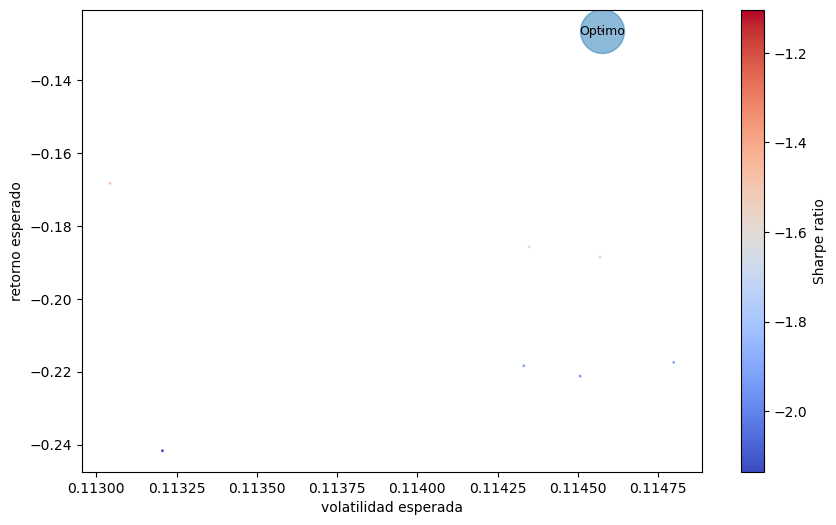

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(filtro2.volatilidad, filtro2.ret_log, c=filtro2.sharpe , s=1, cmap='coolwarm')
plt.xlabel('volatilidad esperada')
plt.ylabel('retorno esperado')
plt.colorbar(label='Sharpe ratio')

plt.scatter(op_vol, op_ret, c='tab:blue', alpha=0.5, s=1000) 
plt.text(op_vol, op_ret, 'Optimo', fontsize=9, c='k', ha='center', va='center') 


# Ejercicio 2

In [43]:
cons2 = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1},
        
       )   


bnds2 = tuple((0.05, 1) for x in range(noa))

In [44]:
%%time
opts2 = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds2,
                    constraints=cons2)  
opts2

CPU times: total: 0 ns
Wall time: 28.8 ms


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.04373671126083949
       x: [ 5.000e-02  5.000e-02  5.000e-02  5.000e-02  5.000e-02
            5.000e-02  5.000e-02  6.500e-01]
     nit: 5
     jac: [ 7.743e+00  1.897e+00  3.200e+00 -3.613e-01  2.876e+00
            4.114e+00  1.887e+00 -1.643e+00]
    nfev: 45
    njev: 5

In [45]:
W2=pd.DataFrame(opts2['x'],columns=["Weights"],index=tickers_portf)
W2

,Weights
PCG,0.05
KMI,0.05
F,0.05
NI,0.05
AMCR,0.05
CTRA,0.05
HPE,0.05
CNP,0.65


# Ejercicio 3

Test Jarque-Bera

In [47]:
test_normal_jb = sms.jarque_bera(log_returns)
test_normal_jb

(array([3.25961591e+02, 1.46817420e+00, 5.68270920e-02, 1.33690052e+00,
        3.42748431e+00, 1.24411830e+00, 2.09982687e+00, 2.62272538e+00]),
 array([1.65325472e-71, 4.79943400e-01, 9.71986323e-01, 5.12502207e-01,
        1.80190230e-01, 5.36837870e-01, 3.49968042e-01, 2.69452626e-01]),
 array([-2.93089993,  0.36758275,  0.08955844,  0.44744884,  0.10923149,
        -0.08827307,  0.36170705, -0.42905079]),
 array([15.89306212,  3.60251433,  3.05373693,  3.14787213,  4.43579074,
         3.85699634,  3.87685414,  3.93682791]))

In [48]:
labels_test_jb = ['Jarque_Bera','p-value','asimetria','curtosis']

In [49]:
pd.Series(test_normal_jb , labels_test_jb)

Jarque_Bera    [325.9615914056345, 1.4681741977714926, 0.0568...
p-value        [1.6532547153854354e-71, 0.4799433999106525, 0...
asimetria      [-2.9308999328730283, 0.3675827456023529, 0.08...
curtosis       [15.89306212236849, 3.6025143272611615, 3.0537...
dtype: object

Test Anderson-Darling

In [50]:
test_ad = sms.normal_ad(log_returns)
test_ad

(array([2.06452285, 0.29510007, 0.33314495, 0.30602488, 0.6595335 ,
        0.41813946, 0.47476639, 0.68883973]),
 array([2.36024138e-05, 5.79128958e-01, 4.98117305e-01, 5.49908358e-01,
        7.87776039e-02, 3.13501551e-01, 2.27644035e-01, 6.64613254e-02]))

In [51]:
labels_test_ad = ['Anderson-darling','p-value']

In [52]:
pd.Series(test_ad , labels_test_ad)

Anderson-darling    [2.0645228547758023, 0.29510007142603456, 0.33...
p-value             [2.3602413812318757e-05, 0.5791289582339663, 0...
dtype: object

Distribucion Empirica

In [53]:
x = np.sort(log_returns)

In [54]:
y = np.arange(1, len(x)+1) / len(x)

In [55]:
y

array([0.02564103, 0.05128205, 0.07692308, 0.1025641 , 0.12820513,
       0.15384615, 0.17948718, 0.20512821, 0.23076923, 0.25641026,
       0.28205128, 0.30769231, 0.33333333, 0.35897436, 0.38461538,
       0.41025641, 0.43589744, 0.46153846, 0.48717949, 0.51282051,
       0.53846154, 0.56410256, 0.58974359, 0.61538462, 0.64102564,
       0.66666667, 0.69230769, 0.71794872, 0.74358974, 0.76923077,
       0.79487179, 0.82051282, 0.84615385, 0.87179487, 0.8974359 ,
       0.92307692, 0.94871795, 0.97435897, 1.        ])

In [57]:
retornos_teoricos = np.random.normal(log_returns.mean(),log_returns.std(),8)

In [58]:
x_t = np.sort(retornos_teoricos)
y_t = np.arange(1 , len(retornos_teoricos) +1) / len(retornos_teoricos)

In [63]:
print(len(x))

39


In [64]:
print(len(y))

39


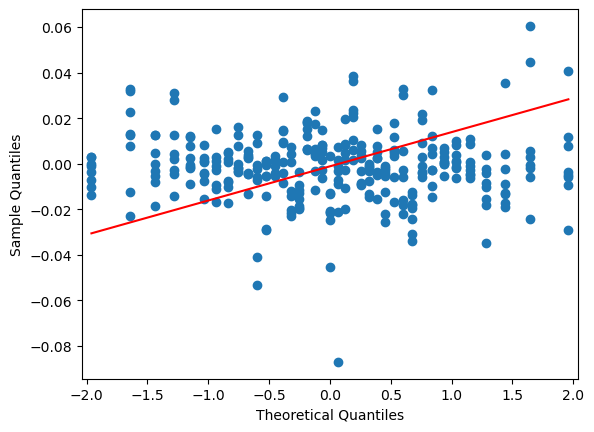

In [66]:
sm.qqplot(log_returns, line = 's')
plt.show()

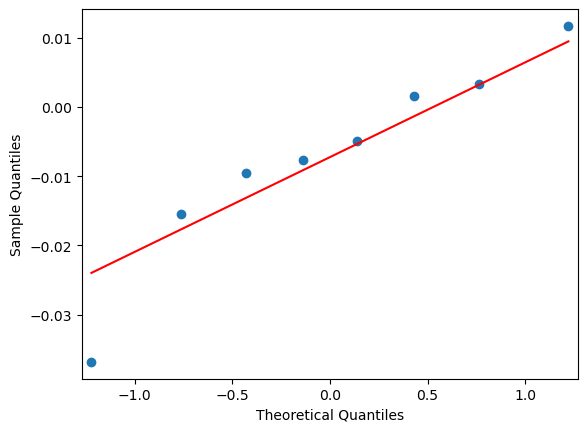

In [70]:
sm.qqplot(x_t , line = 's')
plt.show()